# Practico Mentoria - Analisis Exploratorio y Curación de Datos

---

<h1><FONT COLOR="#e600e5"> Autor: Melania Omonte</FONT></h1>

### Importaciones

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Seteamos una semilla para Reproducibilidad
np.random.seed(0)

<h3> Carga de los Datasets </h3>

In [3]:
player_df = pd.read_csv('./Datasets/football_player.csv')
team_df = pd.read_csv('./Datasets/football_team.csv')
match_df = pd.read_csv('./Datasets/football_match.csv')

<h2>Exploremos un poco los Datasets</h2>

<h3>Players Dataset</h3>

In [4]:
print("Shape 'player_df' = {}".format(player_df.shape))
player_df.sample(5)

Shape 'player_df' = (11060, 40)


,player name,birthday,height_m,weight_kg,overall_rating,potential,preferred foot,crossing,finishing,heading accuracy,...,vision,penalties,marking,standing tackle,sliding tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
1534,Carlos Acuna,1988-06-23,1.78,71.21,67.33,71.81,right,51.52,67.43,68.86,...,44.00,66.67,25.52,30.05,29.00,15.24,12.43,16.43,12.52,11.76
7238,Max Christiansen,1996-09-25,1.88,83.91,64.09,74.45,right,47.73,37.73,60.82,...,56.45,47.00,53.36,67.00,62.36,14.73,6.73,10.73,13.73,8.73
10999,Zakaria M'Sila,1992-04-06,1.78,74.84,59.00,65.10,left,57.30,50.90,50.20,...,54.30,54.80,27.50,32.70,23.30,12.30,15.30,10.30,7.30,13.30
2669,Dimitrija Lazarevski,1982-09-23,1.78,74.84,59.00,61.00,left,51.00,38.00,54.00,...,NaN,61.00,60.00,61.00,NaN,5.00,22.00,45.00,22.00,22.00
1403,Bruma,1994-10-24,1.73,66.22,75.26,85.71,right,67.26,64.34,51.09,...,66.89,70.94,20.71,26.29,22.20,10.09,12.09,7.09,11.09,7.09


<h3>Team Dataset</h3>

In [5]:
print("Shape 'team_df'   = {}".format(team_df.shape))
team_df.sample(5)

Shape 'team_df'   = (288, 22)


,team long name,team short name,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
185,Lechia Gdańsk,LGD,50.83,Balanced,Little,48.33,Mixed,Organised,54.83,Normal,...,61.33,Lots,Organised,50.33,Medium,58.83,Press,56.67,Normal,Cover
222,FC Penafiel,PEN,54.00,Balanced,Normal,39.00,Mixed,Organised,52.00,Normal,...,38.00,Normal,Organised,40.00,Medium,35.00,Press,46.00,Normal,Cover
198,Pogoń Szczecin,POG,55.67,Balanced,Little,42.00,Mixed,Organised,53.33,Normal,...,57.00,Normal,Organised,51.33,Medium,53.67,Press,52.33,Normal,Cover
197,Podbeskidzie Bielsko-Biała,POD,62.00,Balanced,Little,58.50,Mixed,Organised,57.00,Normal,...,45.50,Normal,Organised,38.00,Deep,46.00,Press,43.00,Normal,Cover
173,Excelsior,EXC,57.67,Balanced,Little,60.00,Mixed,Organised,62.67,Normal,...,44.00,Normal,Organised,25.67,Deep,39.33,Press,33.67,Narrow,Cover


<h3>Match Dataset</h3>

In [6]:
print("Shape 'match_df'  = {}".format(match_df.shape))
match_df.sample(5)

Shape 'match_df'  = (25979, 12)


,country name,league name,season,stage,date,home team long name,home short long name,away team long name,away short long name,home team goal,away team goal,total goal
12042,Italy,Italy Serie A,2012/2013,35,2013-05-05 00:00:00,Catania,CAT,Siena,SIE,3,0,3
8575,Germany,Germany 1. Bundesliga,2010/2011,25,2011-03-05 00:00:00,VfB Stuttgart,STU,FC Schalke 04,S04,1,0,1
9067,Germany,Germany 1. Bundesliga,2012/2013,12,2012-11-17 00:00:00,Eintracht Frankfurt,EFR,FC Augsburg,AUG,4,2,6
13165,Italy,Italy Serie A,2015/2016,34,2016-04-21 00:00:00,Milan,ACM,Carpi,CAP,0,0,0
14904,Netherlands,Netherlands Eredivisie,2013/2014,2,2013-08-10 00:00:00,Heracles Almelo,HER,PEC Zwolle,ZWO,1,3,4


<h2>Exploremos un poco los Datasets y sus correspondientes Tipos</h2>

<h3>Players Dtypes</h3>


In [7]:
player_df.dtypes

player name            object
birthday               object
height_m              float64
weight_kg             float64
overall_rating        float64
potential             float64
preferred foot         object
crossing              float64
finishing             float64
heading accuracy      float64
short passing         float64
volleys               float64
dribbling             float64
curve                 float64
free kick accuracy    float64
long passing          float64
ball control          float64
acceleration          float64
sprint speed          float64
agility               float64
reactions             float64
balance               float64
shot power            float64
jumping               float64
stamina               float64
strength              float64
long shots            float64
aggression            float64
interceptions         float64
positioning           float64
vision                float64
penalties             float64
marking               float64
standing t

<h3>Match Dtypes</h3>

In [8]:
match_df.dtypes

country name            object
league name             object
season                  object
stage                    int64
date                    object
home team long name     object
home short long name    object
away team long name     object
away short long name    object
home team goal           int64
away team goal           int64
total goal               int64
dtype: object

<h3>Team Dtypes</h3>

In [9]:
team_df.dtypes

team long name                     object
team short name                    object
buildUpPlaySpeed                  float64
buildUpPlaySpeedClass              object
buildUpPlayDribblingClass          object
buildUpPlayPassing                float64
buildUpPlayPassingClass            object
buildUpPlayPositioningClass        object
chanceCreationPassing             float64
chanceCreationPassingClass         object
chanceCreationCrossing            float64
chanceCreationCrossingClass        object
chanceCreationShooting            float64
chanceCreationShootingClass        object
chanceCreationPositioningClass     object
defencePressure                   float64
defencePressureClass               object
defenceAggression                 float64
defenceAggressionClass             object
defenceTeamWidth                  float64
defenceTeamWidthClass              object
defenceDefenderLineClass           object
dtype: object

---

# 1. Importacion de los datos

<h2>Calculemos el rango de fechas de los partidos</h2>

Antes de calcular el rango de fechas de los partidos, debemos validar que tipo de objeto es la fecha

In [10]:
match_df.dtypes['date']

dtype('O')

Como la fecha es un campo del tipo object, no podremos calcular el rango solicitado,
por lo tanto tendremos que cambiar el tipo, asi podemos generar el valor solicitado.

<h3>Modificamos el tipo "date", para poder calcular el rango</h3>

In [11]:

match_df2 = pd.read_csv("./Datasets/football_match.csv", parse_dates=["date"])



<h3>Visualizamos que haya cambiado el tipo "date"</h3>

In [12]:

match_df2.dtypes['date']


dtype('<M8[ns]')

Validamos que se cambio el tipo a datetime64[ns]

<h3>Realizamos la diferencia, para poder calcular el rango solicitado</h3>

In [13]:
match_df2['date'].max() - match_df2['date'].min()

Timedelta('2868 days 00:00:00')

<h3><FONT COLOR="#008f39">Rta: El rango de fechas entre partidos es 2868 dias.</FONT></h3>

# 2. Etiquetas de variables/columnas: no usar caracteres especiales

Chequar que no haya caracteres fuera de `a-Z`, `0-9` y `_` en los nombres de columnas de los Dataframes:
* `player_df`
* `team_df`
* `match_df`

<h2>Exploramos los Datasets y validamos que no hayan caracteres fuera de lo solicitado</h2>

<h3>Match DataSet</h3>

In [14]:
match_df.columns[~match_df.columns.str.match(r'^(\w+)$')]

Index(['country name', 'league name', 'home team long name',
       'home short long name', 'away team long name', 'away short long name',
       'home team goal', 'away team goal', 'total goal'],
      dtype='object')

Chequeamos que existen varias columnas que tienen caracteres fuera de "a-Z, 0-9 y _" en el dataset match.

<h3>Player DataSet</h3>

In [15]:
player_df.columns[~player_df.columns.str.match(r'^(\w+)$')]

Index(['player name', 'preferred foot', 'heading accuracy', 'short passing',
       'free kick accuracy', 'long passing', 'ball control', 'sprint speed',
       'shot power', 'long shots', 'standing tackle', 'sliding tackle'],
      dtype='object')

Chequeamos que existen varias columnas que tienen caracteres fuera de "a-Z, 0-9 y _" en el dataset player.

<h3>Team DataSet</h3>

In [16]:
team_df.columns[~team_df.columns.str.match(r'^(\w+)$')]

Index(['team long name', 'team short name'], dtype='object')

Chequeamos que existen 2 columnas que tienen caracteres fuera de "a-Z, 0-9 y _" en el dataset team.

<h3>Reemplazamos los valores fuera de "a-Z, 0-9 y _" en el dataset team</h3>

In [17]:
team_df.columns = team_df.columns.str.replace(' ', '_')
team_df.head()

,team_long_name,team_short_name,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,KRC Genk,GEN,56.33,Balanced,Little,44.33,Mixed,Organised,55.67,Normal,...,55.83,Normal,Organised,49.17,Medium,50.67,Press,59.83,Normal,Cover
1,Beerschot AC,BAC,46.00,Balanced,Little,41.50,Mixed,Organised,46.00,Normal,...,53.75,Normal,Organised,48.25,Medium,49.00,Press,58.75,Normal,Cover
2,SV Zulte-Waregem,ZUL,55.50,Balanced,Little,52.67,Mixed,Organised,50.00,Normal,...,41.50,Little,Organised,48.67,Medium,56.17,Press,47.83,Normal,Cover
3,Sporting Lokeren,LOK,64.00,Balanced,Little,53.50,Mixed,Organised,44.00,Normal,...,54.33,Normal,Organised,48.83,Medium,55.17,Press,55.50,Normal,Cover
4,KSV Cercle Brugge,CEB,53.67,Balanced,Little,44.17,Mixed,Organised,59.00,Normal,...,48.00,Normal,Organised,60.17,Medium,49.67,Press,64.67,Normal,Cover


<h3>Validamos que se hayan reemplazado bien los campos en el dataset Team</h3>

In [18]:
team_df.columns[~team_df.columns.str.match(r'^(\w+)$')]

Index([], dtype='object')

Validamos que se reemplazaron exitosamente los campos, ya que la consulta anterior no nos devuelve ningun campo.

<h3>Reemplazamos los valores fuera de "a-Z, 0-9 y _" en el dataset Player</h3>

In [19]:
player_df.columns = player_df.columns.str.replace(' ', '_')
player_df.head()

,player_name,birthday,height_m,weight_kg,overall_rating,potential,preferred_foot,crossing,finishing,heading_accuracy,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,Aaron Appindangoye,1992-02-29,1.83,84.82,63.60,67.60,right,48.60,43.60,70.60,...,53.60,47.60,63.80,66.00,67.80,5.60,10.60,9.60,7.60,7.60
1,Aaron Cresswell,1989-12-15,1.70,66.22,66.97,74.48,left,70.79,49.45,52.94,...,57.45,53.12,69.39,68.79,71.52,12.18,8.67,14.24,10.36,12.91
2,Aaron Doran,1991-05-13,1.70,73.94,67.00,74.19,right,68.12,57.92,58.69,...,69.38,60.54,22.04,21.12,21.35,14.04,11.81,17.73,10.12,13.50
3,Aaron Galindo,1982-05-08,1.83,89.81,69.09,70.78,right,57.22,26.26,69.26,...,53.78,41.74,70.61,70.65,68.04,14.17,11.17,22.87,11.17,10.17
4,Aaron Hughes,1979-11-08,1.83,69.85,73.24,74.68,right,45.08,38.84,73.04,...,46.48,52.96,77.60,76.04,74.60,8.28,8.32,24.92,12.84,11.92


<h3>Validamos que se hayan reemplazado bien los campos en el dataset Player</h3>

In [20]:
player_df.columns[~player_df.columns.str.match(r'^(\w+)$')]

Index([], dtype='object')

Validamos que se reemplazaron exitosamente los campos, ya que la consulta anterior no nos devuelve ningun campo.

<h3>Reemplazamos los valores fuera de "a-Z, 0-9 y _" en el dataset Match</h3>

In [21]:
match_df.columns = match_df.columns.str.replace(' ', '_')
match_df.head()

,country_name,league_name,season,stage,date,home_team_long_name,home_short_long_name,away_team_long_name,away_short_long_name,home_team_goal,away_team_goal,total_goal
0,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-17 00:00:00,KRC Genk,GEN,Beerschot AC,BAC,1,1,2
1,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,SV Zulte-Waregem,ZUL,Sporting Lokeren,LOK,0,0,0
2,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,KSV Cercle Brugge,CEB,RSC Anderlecht,AND,0,3,3
3,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-17 00:00:00,KAA Gent,GEN,RAEC Mons,MON,5,0,5
4,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,FCV Dender EH,DEN,Standard de Liège,STL,1,3,4


<h3>Validamos que se hayan reemplazado bien los campos en el dataset Match</h3>

In [22]:
match_df.columns[~match_df.columns.str.match(r'^(\w+)$')]

Index([], dtype='object')

Validamos que se reemplazaron exitosamente los campos, ya que la consulta anterior no nos devuelve ningun campo.

# 3. Agregar nuevas caracteristicas

Agregar al Dataframe `player_df` una nueva columna que sea `imc` correspondiente al **Indice de Masa Corporal**


In [23]:
from sklearn import preprocessing
player_df_mod = pd.read_csv('./Datasets/football_player.csv')
player_df_mod.head()

,player name,birthday,height_m,weight_kg,overall_rating,potential,preferred foot,crossing,finishing,heading accuracy,...,vision,penalties,marking,standing tackle,sliding tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,Aaron Appindangoye,1992-02-29,1.83,84.82,63.60,67.60,right,48.60,43.60,70.60,...,53.60,47.60,63.80,66.00,67.80,5.60,10.60,9.60,7.60,7.60
1,Aaron Cresswell,1989-12-15,1.70,66.22,66.97,74.48,left,70.79,49.45,52.94,...,57.45,53.12,69.39,68.79,71.52,12.18,8.67,14.24,10.36,12.91
2,Aaron Doran,1991-05-13,1.70,73.94,67.00,74.19,right,68.12,57.92,58.69,...,69.38,60.54,22.04,21.12,21.35,14.04,11.81,17.73,10.12,13.50
3,Aaron Galindo,1982-05-08,1.83,89.81,69.09,70.78,right,57.22,26.26,69.26,...,53.78,41.74,70.61,70.65,68.04,14.17,11.17,22.87,11.17,10.17
4,Aaron Hughes,1979-11-08,1.83,69.85,73.24,74.68,right,45.08,38.84,73.04,...,46.48,52.96,77.60,76.04,74.60,8.28,8.32,24.92,12.84,11.92


<h3>Saco el Cuadrado de la altura, para poder sacar el IMC.
Una vez definido el cuadrado, calculo el IMC</h3>

In [24]:
#altura_cuadrado=player_df_mod['height_m']**2

def imc(peso,altura):
  return peso / (altura*altura)
  

<h3> Agrego la columna IMC en el dataFrame Player</h3>

In [25]:

player_df_mod['IMC'] = player_df_mod.apply(lambda x: imc(x.weight_kg, x.height_m), axis=1)
player_df_mod.describe()

,height_m,weight_kg,overall_rating,potential,crossing,finishing,heading accuracy,short passing,volleys,dribbling,...,penalties,marking,standing tackle,sliding tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,IMC
count,11060.000000,11060.000000,11060.000000,11060.000000,11060.000000,11060.000000,11060.000000,11060.000000,10582.000000,11060.000000,...,11060.000000,11060.000000,11060.000000,10582.000000,11060.000000,11060.000000,11060.000000,11060.000000,11060.000000,11060.000000
mean,1.817847,76.375393,66.821222,72.090216,52.853855,47.862155,56.100191,60.367143,47.110973,56.892354,...,53.683902,46.231480,49.440716,47.124626,14.911413,16.676659,23.015325,16.750476,17.055242,23.086261
std,0.063278,6.799564,6.237719,5.800313,16.169989,18.109552,15.655413,13.508685,17.340289,16.861731,...,13.837462,20.055209,20.336005,20.591114,16.804792,15.472431,17.583860,15.692518,16.754717,1.319189
min,1.570000,53.070000,43.000000,51.000000,6.000000,5.000000,8.000000,10.570000,3.750000,5.140000,...,9.000000,5.000000,6.000000,5.000000,1.000000,2.000000,3.260000,2.000000,2.000000,17.581485
25%,1.780000,72.120000,62.820000,68.000000,43.440000,32.440000,49.097500,55.620000,33.250000,49.110000,...,44.850000,25.000000,29.000000,25.440000,7.770000,9.500000,11.000000,9.437500,9.380000,22.259259
50%,1.830000,76.200000,66.720000,72.000000,56.300000,49.855000,58.805000,63.000000,49.300000,61.100000,...,55.000000,50.000000,55.190000,52.165000,10.140000,12.500000,16.280000,12.500000,12.460000,23.062089
75%,1.850000,81.190000,70.952500,76.000000,64.710000,63.060000,66.750000,69.007500,60.737500,68.782500,...,63.930000,64.200000,67.000000,65.120000,13.000000,15.390000,27.302500,15.422500,15.380000,23.872576
max,2.080000,110.220000,92.190000,95.230000,89.360000,92.230000,93.110000,95.180000,90.790000,96.460000,...,92.000000,90.670000,90.200000,94.370000,89.860000,86.880000,89.000000,91.620000,90.950000,30.766147


<h2> Grafico de distribucion de IMC</h2>

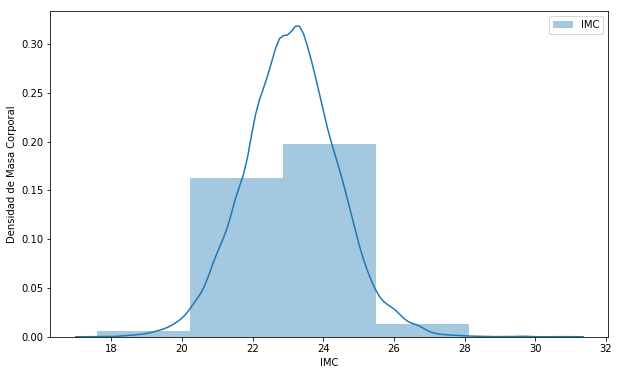

In [26]:

plt.figure(figsize=(10,6))

## Grafico la distribucion de Masa Corporal"  
sns.distplot(player_df_mod.IMC, kde=True, bins=5, label='IMC')

plt.ylabel('Densidad de Masa Corporal')
plt.legend()

<h2> Visualizamos los valores atipicos para el calculo realizado de IMC</h2>

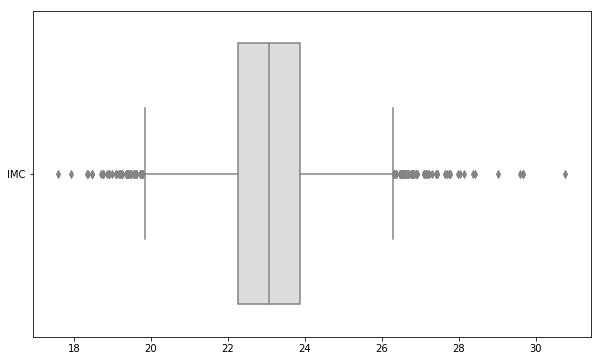

In [27]:
#Para observar valores atípicos visualizamos el gráfico de caja...
plt.figure(figsize=(10,6))
data = player_df_mod[['IMC']]
sns.boxplot(data = data, orient="h", palette="coolwarm")
#sns.stripplot(data=data, color='black')
plt.show()

# 4. Tratar valores faltantes

Veamos cuantos valores nulos tenemos

In [28]:
player_missing_values_count = player_df.isnull().sum()

player_missing_values_count[player_missing_values_count > 0]

volleys           478
curve             478
agility           478
balance           478
jumping           478
vision            478
sliding_tackle    478
dtype: int64

Tenemos 478 valores nulos en 7 columnas del DataFrame Player

In [29]:
len( player_df.dropna())/len(player_df)

0.9567811934900543

In [30]:
len(player_df.dropna(subset=['volleys']))/len(player_df)

0.9567811934900543

In [31]:
player_df[player_df.volleys.isnull()]

,player_name,birthday,height_m,weight_kg,overall_rating,potential,preferred_foot,crossing,finishing,heading_accuracy,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
25,Abdelmajid Oulmers,1978-09-12,1.73,64.86,68.80,69.40,right,60.00,50.00,62.00,...,NaN,47.00,56.00,54.00,NaN,7.00,17.40,62.00,18.40,17.00
30,Abdeslam Ouaddou,1978-11-01,1.90,82.10,76.60,78.60,right,67.20,34.00,78.00,...,NaN,68.80,80.40,76.60,NaN,5.00,20.40,75.00,20.40,19.80
31,Abdessalam Benjelloun,1985-01-28,1.88,81.19,63.33,71.33,right,42.00,66.17,41.50,...,NaN,50.17,22.00,27.00,NaN,7.00,17.67,35.00,17.83,17.33
83,Aco Stojkov,1983-04-29,1.78,74.84,59.67,62.67,right,59.67,57.67,62.67,...,NaN,47.67,23.00,27.67,NaN,12.00,23.00,38.67,23.00,23.00
85,Adailton,1977-01-24,1.75,73.03,71.83,74.00,left,54.67,74.50,62.17,...,NaN,61.83,21.00,53.00,NaN,9.00,19.17,53.17,20.67,20.83
175,Adrian Paluchowski,1987-08-19,1.80,74.84,55.00,60.50,right,43.00,57.00,49.00,...,NaN,50.00,22.00,28.00,NaN,3.00,22.00,48.00,22.00,22.00
190,Adriano,1982-01-21,1.75,76.20,68.75,74.00,right,52.00,71.00,67.00,...,NaN,50.00,21.00,22.00,NaN,9.00,21.00,53.00,21.00,21.00
203,"Afonso Alves,24",1981-01-30,1.85,73.94,80.29,85.29,right,60.43,83.57,73.57,...,NaN,78.00,25.00,23.71,NaN,8.00,19.86,56.00,19.57,20.00
253,Alan Haydock,1976-01-13,1.75,72.12,63.33,65.67,right,60.00,43.00,62.67,...,NaN,69.00,55.00,64.00,NaN,13.00,20.00,63.67,20.33,20.00
275,Albert Baning,1985-03-19,1.93,81.19,65.00,78.00,right,35.00,30.00,56.60,...,NaN,59.00,62.00,70.00,NaN,9.00,17.60,62.20,17.80,17.60


<h2>Eliminamos los valores nulos</h2>

In [32]:
player_df_mod = player_df_mod.dropna(subset=['volleys'])

In [33]:
player_df_mod.describe()

,height_m,weight_kg,overall_rating,potential,crossing,finishing,heading accuracy,short passing,volleys,dribbling,...,penalties,marking,standing tackle,sliding tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,IMC
count,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,...,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000
mean,1.818073,76.385504,66.884030,72.125307,52.925430,47.874585,56.039142,60.447359,47.110973,57.061743,...,53.387872,46.109403,49.369510,47.124626,14.961509,16.334026,21.529769,16.408309,16.721107,23.083465
std,0.063466,6.814978,6.173155,5.732213,16.209403,18.158696,15.631791,13.481913,17.340289,16.898781,...,13.832998,20.051442,20.370986,20.591114,16.802652,15.481157,16.295850,15.702236,16.800936,1.320939
min,1.570000,53.070000,43.750000,51.000000,6.000000,5.000000,8.000000,10.570000,3.750000,5.140000,...,9.000000,5.000000,6.000000,5.000000,1.830000,2.000000,3.260000,2.000000,2.000000,17.920000
25%,1.780000,72.120000,62.902500,68.050000,43.505000,32.430000,49.150000,55.860000,33.250000,49.500000,...,44.470000,25.000000,28.892500,25.440000,7.822500,9.312500,11.000000,9.310000,9.242500,22.259259
50%,1.830000,76.200000,66.790000,72.060000,56.520000,50.000000,58.710000,63.000000,49.300000,61.330000,...,54.710000,49.880000,55.125000,52.165000,10.200000,12.230000,15.420000,12.245000,12.220000,23.062089
75%,1.850000,81.190000,70.950000,76.000000,64.800000,63.137500,66.710000,69.040000,60.737500,68.940000,...,63.617500,64.127500,67.000000,65.120000,13.000000,15.000000,25.065000,15.000000,15.000000,23.872576
max,2.080000,110.220000,92.190000,95.230000,89.360000,92.230000,93.110000,95.180000,90.790000,96.460000,...,89.570000,89.670000,90.200000,94.370000,89.860000,86.880000,87.130000,91.620000,90.950000,30.766147


<h2>Validamos que se hayan validado esos valores nulos</h2>

In [34]:

player_missing_values_count = player_df_mod.isnull().sum()

player_missing_values_count[player_missing_values_count > 0]

Series([], dtype: int64)

Validamos que se eliminaron exitosamente los campos nulos, ya que no devuelve ningun valor la consulta realizada.

In [35]:
player_df[player_df.volleys.isnull()]

,player_name,birthday,height_m,weight_kg,overall_rating,potential,preferred_foot,crossing,finishing,heading_accuracy,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
25,Abdelmajid Oulmers,1978-09-12,1.73,64.86,68.80,69.40,right,60.00,50.00,62.00,...,NaN,47.00,56.00,54.00,NaN,7.00,17.40,62.00,18.40,17.00
30,Abdeslam Ouaddou,1978-11-01,1.90,82.10,76.60,78.60,right,67.20,34.00,78.00,...,NaN,68.80,80.40,76.60,NaN,5.00,20.40,75.00,20.40,19.80
31,Abdessalam Benjelloun,1985-01-28,1.88,81.19,63.33,71.33,right,42.00,66.17,41.50,...,NaN,50.17,22.00,27.00,NaN,7.00,17.67,35.00,17.83,17.33
83,Aco Stojkov,1983-04-29,1.78,74.84,59.67,62.67,right,59.67,57.67,62.67,...,NaN,47.67,23.00,27.67,NaN,12.00,23.00,38.67,23.00,23.00
85,Adailton,1977-01-24,1.75,73.03,71.83,74.00,left,54.67,74.50,62.17,...,NaN,61.83,21.00,53.00,NaN,9.00,19.17,53.17,20.67,20.83
175,Adrian Paluchowski,1987-08-19,1.80,74.84,55.00,60.50,right,43.00,57.00,49.00,...,NaN,50.00,22.00,28.00,NaN,3.00,22.00,48.00,22.00,22.00
190,Adriano,1982-01-21,1.75,76.20,68.75,74.00,right,52.00,71.00,67.00,...,NaN,50.00,21.00,22.00,NaN,9.00,21.00,53.00,21.00,21.00
203,"Afonso Alves,24",1981-01-30,1.85,73.94,80.29,85.29,right,60.43,83.57,73.57,...,NaN,78.00,25.00,23.71,NaN,8.00,19.86,56.00,19.57,20.00
253,Alan Haydock,1976-01-13,1.75,72.12,63.33,65.67,right,60.00,43.00,62.67,...,NaN,69.00,55.00,64.00,NaN,13.00,20.00,63.67,20.33,20.00
275,Albert Baning,1985-03-19,1.93,81.19,65.00,78.00,right,35.00,30.00,56.60,...,NaN,59.00,62.00,70.00,NaN,9.00,17.60,62.20,17.80,17.60


Algunas tecnicas para tratar los _missing values_:
* **Eliminar** muestras o variables que tienen datos faltantes.
* **Imputar** los valores perdidos, es decir, sustituirlos por estimaciones por ejemplo la `media`, la `moda` ó usando `KNN`.

A) Analizar si es conveniente **Eliminar** las muestras o variables con datos faltantes del Dataframe `player_df`. 

B) Aplicar la **Imputacion** usando la `media` o `moda` sobre las columnas con _missing values_ del Dataframe `player_df`.


### ¿Eliminar los _missing values_? Justificar

# Elimino los valores en un dataset modificado
Para eliminar los valores missing, debemos realizar un analisis sobre esos campos.Las columnas con valores missing
son:
volleys           478
curve             478
agility           478
balance           478
jumping           478
vision            478
sliding_tackle    478

Una de las soluciones para resolver este problema podria ser llenar estos los valores con ceros. Pero esta solucion
no seria la mas optima, porque por ejemplo para un jugador, tendriamos que su agilidad es cero, y no seria representativo.

Otra de las opciones para resolver este problema es decidir eliminar estos valores, suponiendo que los valores 
missing pueden ser errores, de esta manera subsanamos dicho error.

Otra de las opciones es la imputacion de la Media o Moda, segun corresponda, analisis detallado mas abajo.


<h2> Imputacion usando Media y Moda</h2>
<h3> Reemplazo de Valores Faltantes usando la moda</h3>

In [36]:
# Rellenamos usando la Moda
# player_df.fillna(player_df.mode(), inplace=True)

player_df_reemplazo_nan_moda = player_df

for column in ['volleys','agility','curve','balance','jumping','vision','sliding_tackle']:
    player_df_reemplazo_nan_moda[column].fillna(player_df_reemplazo_nan_moda[column].mode()[0], inplace=True)

player_df_reemplazo_nan_moda



,player_name,birthday,height_m,weight_kg,overall_rating,potential,preferred_foot,crossing,finishing,heading_accuracy,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,Aaron Appindangoye,1992-02-29,1.83,84.82,63.60,67.60,right,48.60,43.60,70.60,...,53.60,47.60,63.80,66.00,67.80,5.60,10.60,9.60,7.60,7.60
1,Aaron Cresswell,1989-12-15,1.70,66.22,66.97,74.48,left,70.79,49.45,52.94,...,57.45,53.12,69.39,68.79,71.52,12.18,8.67,14.24,10.36,12.91
2,Aaron Doran,1991-05-13,1.70,73.94,67.00,74.19,right,68.12,57.92,58.69,...,69.38,60.54,22.04,21.12,21.35,14.04,11.81,17.73,10.12,13.50
3,Aaron Galindo,1982-05-08,1.83,89.81,69.09,70.78,right,57.22,26.26,69.26,...,53.78,41.74,70.61,70.65,68.04,14.17,11.17,22.87,11.17,10.17
4,Aaron Hughes,1979-11-08,1.83,69.85,73.24,74.68,right,45.08,38.84,73.04,...,46.48,52.96,77.60,76.04,74.60,8.28,8.32,24.92,12.84,11.92
5,Aaron Hunt,1986-09-04,1.83,73.03,77.26,80.15,left,73.89,72.81,65.52,...,79.96,75.59,31.70,31.52,32.33,13.22,12.41,15.07,15.56,14.85
6,Aaron Kuhl,1996-01-30,1.73,66.22,60.57,76.00,right,47.57,31.57,46.57,...,60.00,41.57,51.57,57.14,56.57,7.57,12.57,13.57,13.57,14.57
7,Aaron Lennon,1987-04-16,1.65,63.05,79.77,82.00,right,78.04,65.96,30.46,...,78.46,63.46,23.23,26.15,20.88,12.85,9.81,17.88,16.92,13.12
8,Aaron Lennox,1993-02-19,1.90,82.10,48.00,56.86,right,12.00,15.00,16.00,...,15.00,41.00,15.00,15.00,12.00,53.00,41.00,39.00,51.00,53.00
9,Aaron Meijers,1987-10-28,1.75,77.11,67.05,69.42,left,63.89,46.05,56.84,...,64.79,54.42,62.58,64.58,61.74,6.21,14.21,6.21,9.21,14.21


<h3>Validamos que se hayan reemplazado bien los valores y que no hayan valores missing:</h3>

In [37]:
player_missing_values_count = player_df.isnull().sum()

player_missing_values_count[player_missing_values_count > 0]

Series([], dtype: int64)

Se comprueba exitosamente que no hay valores missing, una vez que se reemplazaron los datos por su moda.

<h3> Reemplazo de Valores Faltantes usando la Media</h3>

In [38]:
# Rellenamos usando la Moda
player_df_reemplazo_nan_media = player_df
player_df_reemplazo_nan_media.fillna(player_df_reemplazo_nan_media.mean(), inplace=True)


In [39]:
player_missing_values_count = player_df_reemplazo_nan_media.isnull().sum()

player_missing_values_count[player_missing_values_count > 0]

Series([], dtype: int64)

Se comprueba exitosamente que no hay valores missing, una vez que se reemplazaron los datos por su media.

# 5. Normalizacion de columnas


Normalizar la columna `crossing` usando **Min-Max**.

Normalizar la columna `short_passing` usando **Z-score**.


<h2> Normalizando la columna crossing, usando Min-Max</h2>

Normalizamos la columna y mostramos un listado antes de la normalizacion y despues de la misma

In [40]:
# TODO
print(player_df.crossing.head(10))

scaler = preprocessing.MinMaxScaler()
player_df[["crossing"]] = scaler.fit_transform(player_df[["crossing"]])

print(player_df.crossing.head(10))

0    48.60
1    70.79
2    68.12
3    57.22
4    45.08
5    73.89
6    47.57
7    78.04
8    12.00
9    63.89
Name: crossing, dtype: float64
0    0.511036
1    0.777231
2    0.745202
3    0.614443
4    0.468810
5    0.814419
6    0.498680
7    0.864203
8    0.071977
9    0.694458
Name: crossing, dtype: float64


<h2>Normalizamos la columna short_passing usando Z-score</h2>

Normalizamos la columna y mostramos un listado antes de la normalizacion y despues de la misma.

In [41]:

print(player_df["short_passing"].head(10))

scaler = preprocessing.MinMaxScaler()
player_df[["short_passing"]] = sp.stats.zscore(player_df[["short_passing"]])

print(player_df["short_passing"].head(10))

0    60.60
1    62.27
2    65.12
3    64.70
4    64.76
5    78.26
6    63.57
7    76.27
8    23.00
9    68.95
Name: short_passing, dtype: float64
0    0.017238
1    0.140868
2    0.351853
3    0.320761
4    0.325202
5    1.324605
6    0.237107
7    1.177285
8   -2.766282
9    0.635387
Name: short_passing, dtype: float64


# 6. Codificar variables

> Las variables categóricas deben ser etiquetadas como variables numéricas, no como cadenas.

Codificar la variable `country_name` del Dataframe `match_df`

<h2> La columna "country_name" antes de ser etiquetada como variable numerica</h2>

In [42]:

print(set(match_df["country_name"]))

{'Portugal', 'Scotland', 'Switzerland', 'Italy', 'Poland', 'Spain', 'Belgium', 'Germany', 'Netherlands', 'France', 'England'}


<h2>Etiqueto como variables numericas a la columna "country_name"</h2>

In [43]:
le = preprocessing.LabelEncoder()
match_df[["country_name"]] = le.fit_transform(match_df[["country_name"]])

<h2>Visualizo la columna, con los datos ya transformados</h2>

In [44]:
print(set(match_df["country_name"]))


{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10}


A la columna "country_name", la etiquedamos con variables numericas